Polynomial Regression สมการพหุนาม คือสมการที่ไม่เป็นเส้นตรง ลักษณะเป็นเส้นโค้ง

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('position_salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
sm = dataset.loc[:,['Level','Salary']]
sm

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [4]:
X = sm.iloc[:, :-1].values
y = sm.iloc[:, -1].values

In [5]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [6]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
# # Scaling
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)

In [9]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

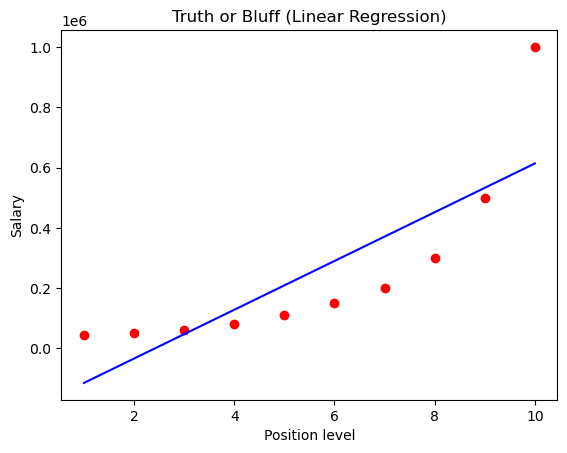

In [10]:
# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

In [11]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
# model = LinearRegression()
# model.fit(X_poly, y)

LinearRegression()

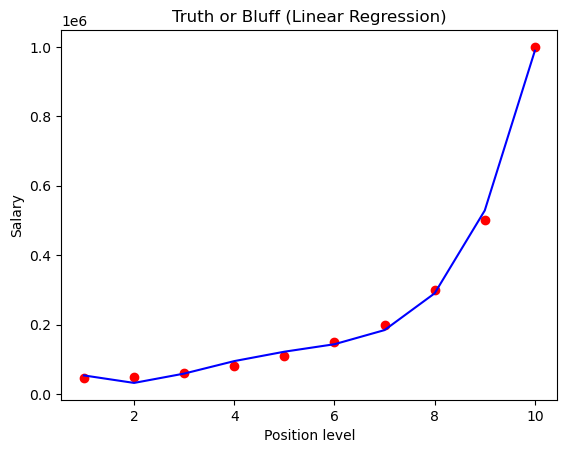

In [12]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

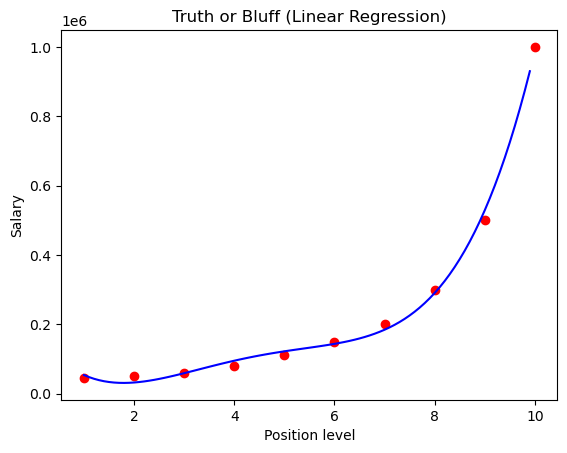

In [13]:
# Additional feature
# Making the plot line (Blue one) more smooth
def viz_polymonial_smooth():
    X_grid = np.arange(min(X), max(X), 0.1)
    X_grid = X_grid.reshape(len(X_grid), 1) #Why do we need to reshape? (https://www.tutorialspoint.com/numpy/numpy_reshape.htm)
    # Visualizing the Polymonial Regression results
    plt.scatter(X, y, color='red')
    plt.plot(X_grid, pol_reg.predict(poly_reg.fit_transform(X_grid)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial_smooth()

In [14]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [15]:
# Predicting a new result with Linear Regression
lin_reg.predict([[9]]).round(2)
#output should be 249500

array([532575.76])

In [16]:
# Predicting a new result with Polymonial Regression
m = pol_reg.predict(poly_reg.fit_transform([[9]])).round(2)
#output should be 132148.43750003
m

array([528694.64])

In [17]:
m = pol_reg.predict(poly_reg.fit_transform(X)).round(2)
print(pd.DataFrame(m).rename(columns={0:'เงินเดือนที่พยากรณ์'}))

   เงินเดือนที่พยากรณ์
0             53356.64
1             31759.91
2             58642.19
3             94632.87
4            121724.94
5            143275.06
6            184003.50
7            289994.17
8            528694.64
9            988916.08


In [18]:
Lavel = float(input("กรอกข้อมูลเพื่อพยากรณ์เงินเดือนผู้บริหาร: "))

In [19]:
result = pol_reg.predict(poly_reg.fit_transform([[Lavel]])).round(2)
print("การพยากรณ์เงินเดือนผู้บริหาร:", result, 'บาท')

การพยากรณ์เงินเดือนผู้บริหาร: [1.12554957e+10] บาท


In [212]:
#conda install -c anaconda scikit-learn
#pip install -U scikit-learn
#from sklearn.externals import joblib
import numpy as np
import joblib

joblib.dump(pol_reg, 'poly_model.pkl')
model = joblib.load('poly_model.pkl')